<a href="https://colab.research.google.com/github/Columbia-Neuropythonistas/PythonDataCourse2021/blob/main/Lecture3_pandaspart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start by importing pandas - go ahead and do that now:

In [ ]:
import pandas as pd

Let's start by building our DataFrame from last lecture:

Link to csv: https://raw.githubusercontent.com/Columbia-Neuropythonistas/PythonDataCourse/master/Homeworks/HW3/lotr_char_age.csv

Use the read_csv function to create a pandas dataframe called lotr_df, and take a look at just the first three rows:
 

In [ ]:
lotr_df = pd.read_csv('https://raw.githubusercontent.com/Columbia-Neuropythonistas/PythonDataCourse/master/Homeworks/HW3/lotr_char_age.csv')

Oh no! The Tolkien fan who made our dataset didn't know that it can be hard to work with spaces in code - to make things easier for future users, let's see if we can rename our 'Character Name' column to 'Character_Name'. This can easily be accomplished using the rename method, which takes in dict-like input that can be specified to __either__ columns or the index. In this case, the format would look like: 
<br><br> <code> DataFrame.rename( {<br>      <font color=red> 'EXISTING COLUMN'</font>: <font color=blue> 'NEW NAME'</font>, etc. <br>           }, axis = 'columns')

Go ahead and give that a try below:

Now that we've got our column names in order, let's take a look at one of the most powerful tools we have with DataFrames : the groupby() function.
<br><br>
Simply put, <code>groupby(['CATEGORY'])</code> is a method of grouping categories, and applying a function to each group. Let's just test it out to see what's going on! Create a DataFrame called "being_stats" that is lotr_df grouped by beings, and run the "count()" method on it:

In [ ]:
#Feel free to just run the code below to see output
being_stats = lotr_df.groupby(['Beings'])
being_stats.count()

,Character Name,Age
Beings,,
dwarf,1,1
dwarf,1,1
elf,5,5
hobbit,5,5
human,5,5


What the above output is telling us is that each label under "Beings" is a unique value in the lotr_df['Beings'] column. For elves, there are 5 entered character names, and 5 entered ages.
<br><br> But how strange! It looks like we're seeing...two dwarfs (dwarves, I know...)?? Can anybody think of a reason for this?

We can take a closer look by using the unique() function - run 
<code> 

lotr_df['Beings'].unique()</code>. What do you see?



This is all part of cleaning data, folks! People make mistakes!
<br><br> In this case, we want to go in and replace the error, 'dwarf ', with 'dwarf'. To do this, let's use the replace() function associated with DataFrames. replace() can take in dict-like formats just like rename() - it will look like this:<br><br>
<code>        DataFrame.replace({<font color = red>'COLUMN NAME' : VALUE IN COLUMN </font>}, 
          <font color = blue>VALUE TO BE INSERTED</font> )
    
    <br><br>
    
    Try replacing 'dwarf ' with the correct value below - can you check just the dwarf entries using .loc? :

In [ ]:
# a more advanced way of string manipulation using string methods
lotr_df['Beings'].str.strip(' ').unique()

array(['human', 'elf', 'dwarf', 'hobbit'], dtype=object)

Let's fetch a bunch of stock data as a test

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/vega/vega-lite-v1/master/data/stocks.csv')

In [ ]:
df.head()

,symbol,date,price
0,MSFT,Jan 1 2000,39.81
1,MSFT,Feb 1 2000,36.35
2,MSFT,Mar 1 2000,43.22
3,MSFT,Apr 1 2000,28.37
4,MSFT,May 1 2000,25.45


What are the data types of each column?

In [ ]:
df.dtypes

symbol     object
date       object
price     float64
dtype: object

We actually want `'date'` to be a datetime object instead of a generic object column

In [ ]:
pd.to_datetime?

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=False, yearfirst=False)

In [ ]:
df.dtypes

symbol            object
date      datetime64[ns]
price            float64
dtype: object

In [ ]:
df['symbol'] = df['symbol'].astype("string")

In [ ]:
df.dtypes

symbol            string
date      datetime64[ns]
price            float64
dtype: object

## More Groupby functionality

What is the average price of each stock across all time - use groupby to calculate this?

Is there a way to get a general idea of the statistics of the columns I am interested in?

In [ ]:
df.groupby('symbol')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,123.0,64.730488,63.123782,7.07,11.155,36.81,102.460,223.02
AMZN,123.0,47.987073,28.891321,5.97,29.405,41.50,65.895,135.91
GOOG,68.0,415.870441,135.069851,102.37,338.395,420.46,503.625,707.00
IBM,123.0,91.261220,16.513365,53.01,77.365,88.70,101.945,130.32
MSFT,123.0,24.736748,4.303958,15.81,21.760,24.11,27.295,43.22


Can I do this for datetime objects as well?

In [ ]:
df['symbol'].describe()

count      560
unique       5
top       AAPL
freq       123
Name: symbol, dtype: object

In [ ]:
df.groupby('symbol')['date'].describe(datetime_is_numeric=True)

,count,mean,min,25%,50%,75%,max
symbol,,,,,,,
AAPL,123,2005-01-30 09:57:04.390243840,2000-01-01,2002-07-16 12:00:00,2005-02-01 00:00:00,2007-08-16 12:00:00,2010-03-01
AMZN,123,2005-01-30 09:57:04.390243840,2000-01-01,2002-07-16 12:00:00,2005-02-01 00:00:00,2007-08-16 12:00:00,2010-03-01
GOOG,68,2007-05-17 11:38:49.411764736,2004-08-01,2005-12-24 06:00:00,2007-05-16 12:00:00,2008-10-08 18:00:00,2010-03-01
IBM,123,2005-01-30 09:57:04.390243840,2000-01-01,2002-07-16 12:00:00,2005-02-01 00:00:00,2007-08-16 12:00:00,2010-03-01
MSFT,123,2005-01-30 09:57:04.390243840,2000-01-01,2002-07-16 12:00:00,2005-02-01 00:00:00,2007-08-16 12:00:00,2010-03-01


## Pivot tables, melting tables, stacking tables

Can we represent this data a little differently? What if we want a wide-form data format where each value in the table is simply the value of the stock and each row is a different date and each column is a different stock.

In [ ]:
pivoted_df = df.pivot(
    'date', 
    'symbol', 
    'price'
)
pivoted_df

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,25.94,64.56,NaN,100.52,39.81
2000-02-01,28.66,68.87,NaN,92.11,36.35
2000-03-01,33.95,67.00,NaN,106.11,43.22
2000-04-01,31.01,55.19,NaN,99.95,28.37
2000-05-01,21.00,48.31,NaN,96.31,25.45
...,...,...,...,...,...
2009-11-01,199.91,135.91,583.00,125.79,29.27
2009-12-01,210.73,134.52,619.98,130.32,30.34
2010-01-01,192.06,125.41,529.94,121.85,28.05


This is nice! We could caclulate the correlation between different stocks in this time period easily using pandas as well

In [ ]:
pivoted_df.corr()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
symbol,,,,,
AAPL,1.000000,0.872996,0.849000,0.710545,0.357936
AMZN,0.872996,1.000000,0.674580,0.701340,0.392105
GOOG,0.849000,0.674580,1.000000,0.665615,0.710338
IBM,0.710545,0.701340,0.665615,1.000000,0.560398
MSFT,0.357936,0.392105,0.710338,0.560398,1.000000


## They see me rolling!

Plotting your traces...

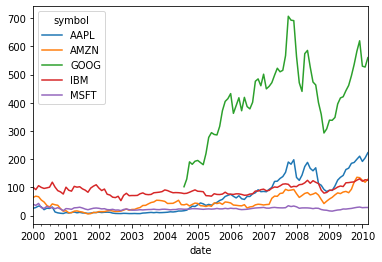

In [ ]:
pivoted_df.plot()

What if we want to smooth our data here to more easily visualize general trends? Can we do this easily with pandas?

In [ ]:
pivoted_df.rolling?

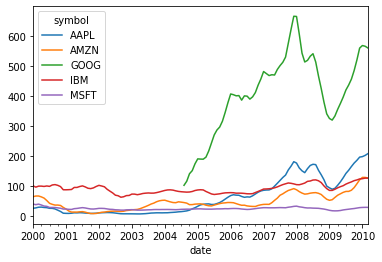

In [ ]:
pivoted_df.rolling('100d').mean().plot()